# Ford GoBike Dataset Exploration 
## by Mehraiel Mina

## Preliminary Wrangling

> Briefly introduce your dataset here.
- bike dataset contain 183412 entries & 16 columns and its about sharing the bike 

In [18]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [19]:
data = pd.read_csv("201902-fordgobike-tripdata.csv")
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [21]:
data.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [23]:
print(data.shape)
print(data.dtypes)
print(data.describe())

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
        duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000

### What is the structure of your dataset?

> the bike dataset is about bike sharing and travelling from station to another and contain the start and end time of trip and its duration , also contain user type if customer or subscriber and its gender

### What is/are the main feature(s) of interest in your dataset?

> The user type with the most common time and day and duration of trip


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> - the most common time(s_hour) , week(s_day_of_week)  of trip
> - the duration of trip (duration_sec)
> - user type if customer or subscriber (user_type)

#### split time , day of week , month from column start time
- first convert the column into datetime type
- then split the hour , day , month

In [24]:
data['start_time'] = pd.to_datetime(data['start_time'])
data['s_month'] = data['start_time'].dt.month
data['s_day_of_week'] = data['start_time'].dt.weekday_name
data['s_hour'] = data['start_time'].dt.hour

In [26]:
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,s_month,s_day_of_week,s_hour,e_month,e_day_of_week,e_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,2,Thursday,17,3,Friday,8
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,Customer,NaN,NaN,No,2,Thursday,18,3,Friday,6
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,2,Thursday,12,3,Friday,5
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,2,Thursday,17,3,Friday,4
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,2,Thursday,23,3,Friday,0


- Most common start time

In [27]:
# display the most common month
most_month = data['s_month'].mode()
print("most common month",most_month)

# display the most common day of week
most_day = data['s_day_of_week'].mode()
print("most common day",most_day)

# display the most common start hour
popular_hour = data['s_hour'].mode()[0]
print("most common time",popular_hour)

most common month 0    2
dtype: int64
most common day 0    Thursday
dtype: object
most common time 17


- Most common end time

In [29]:
print(data.describe())

        duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.00000

- will not use columns of null values

In [186]:
data.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
s_month                       0
s_day_of_week                 0
s_hour                        0
e_month                       0
e_day_of_week                 0
e_hour                        0
average                       0
duration                      0
dtype: int64

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

###### Most common hours

In [196]:
print(data['s_hour'].value_counts())
#so steps increment is equal 1 for each 1 hour

17    21864
8     21056
18    16827
9     15903
16    14169
7     10614
19     9881
15     9174
12     8724
13     8551
10     8364
14     8152
11     7884
20     6482
21     4561
6      3485
22     2916
23     1646
0       925
5       896
1       548
2       381
4       235
3       174
Name: s_hour, dtype: int64


Text(0, 0.5, 'count of trips in this hour')

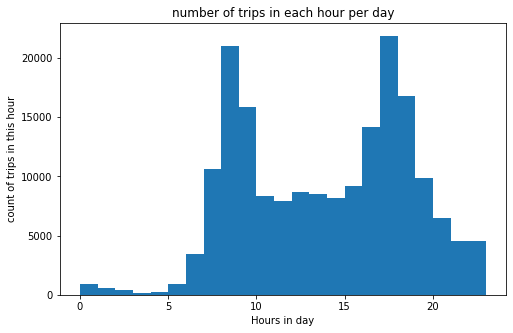

In [257]:
bins = np.arange(data['s_hour'].min(), data['s_hour'].max()+1,1 )
plt.figure(figsize=[8, 5])
plt.hist(data = data, x = 's_hour', bins = bins)
plt.title('number of trips in each hour per day')
plt.xlabel('Hours in day')
plt.ylabel('count of trips in this hour')

###### Most common days in week

Text(0, 0.5, 'count of trips in this day')

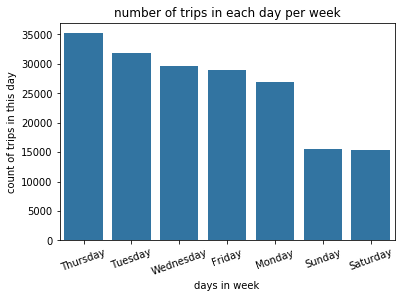

In [258]:
default = sb.color_palette()[0]
sb.countplot(data = data, x = 's_day_of_week',color = default,order = data['s_day_of_week'].value_counts().index)
plt.xticks(rotation=20);
plt.title('number of trips in each day per week')
plt.xlabel('days in week')
plt.ylabel('count of trips in this day')

###### Most common month in year 

2    183412
Name: s_month, dtype: int64


Text(0, 0.5, 'count of trips in this month')

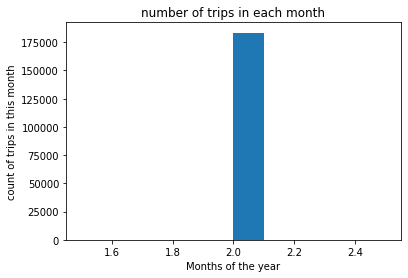

In [259]:
print(data['s_month'].value_counts())
plt.hist(data = data, x = 's_month')
plt.title('number of trips in each month')
plt.xlabel('Months of the year')
plt.ylabel('count of trips in this month')

#### conclude :-
- First : calculate the most common start time and day of week and month of year by calculation using mode
- Second : visualising and plotting this calculation using graph 

> so 
- The most common start time is 17 which is 5pm 
- The most common day of week is Thrusday
- But the month of year .. all dataset the month is 2 (Feb)

######  Duration of the trips

Text(0.5, 1.0, 'number of trips in each Durations')

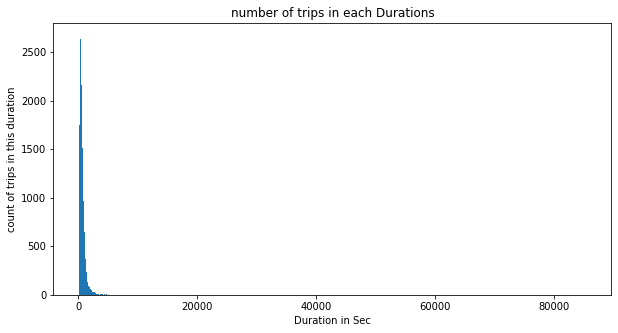

In [261]:
bins = np.arange(data['duration_sec'].min(), data['duration_sec'].max()+10,10 )
plt.figure(figsize=[10, 5])
plt.hist(data = data, x = 'duration_sec', bins = bins)
plt.xlabel('Duration in Sec')
plt.ylabel('count of trips in this duration')
plt.title('number of trips in each Durations')

In [52]:
print(data['duration_sec'].value_counts())

272      311
324      292
323      291
306      291
305      290
        ... 
5803       1
11870      1
5931       1
15964      1
5058       1
Name: duration_sec, Length: 4752, dtype: int64


Text(0.5, 1.0, 'number of trips in each Durations (from 0 to 2000 sec)')

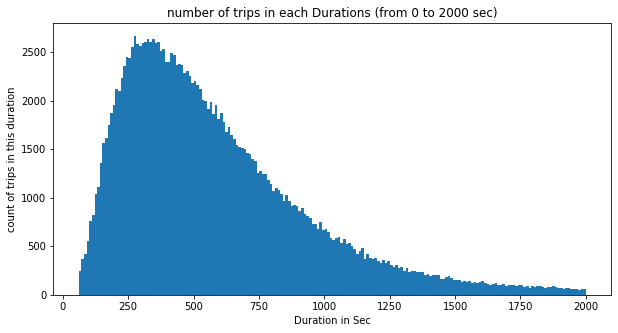

In [262]:
bins = np.arange(data['duration_sec'].min(), 2000+10,10 )
plt.figure(figsize=[10, 5])
plt.hist(data = data, x = 'duration_sec', bins = bins)
plt.xlabel('Duration in Sec')
plt.ylabel('count of trips in this duration')
plt.title('number of trips in each Durations (from 0 to 2000 sec)')

- in Mins

Text(0.5, 1.0, 'number of trips in each Durations ')

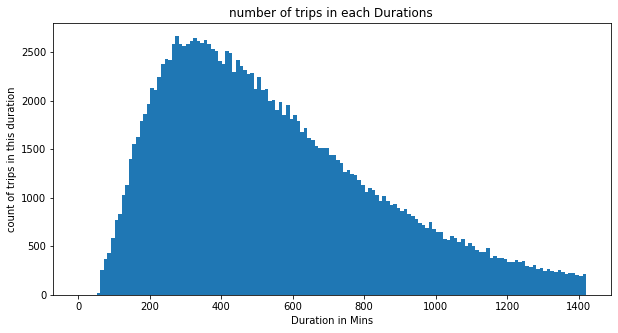

In [263]:
bins = np.arange((data['duration_sec'].min())/60, (data['duration_sec'].max()+10)/60,10 )
plt.figure(figsize=[10, 5])
plt.hist(data = data, x = 'duration_sec', bins = bins)
plt.xlabel('Duration in Mins')
plt.ylabel('count of trips in this duration')
plt.title('number of trips in each Durations ')

Text(0.5, 1.0, 'number of trips in each Durations (log transformation)')

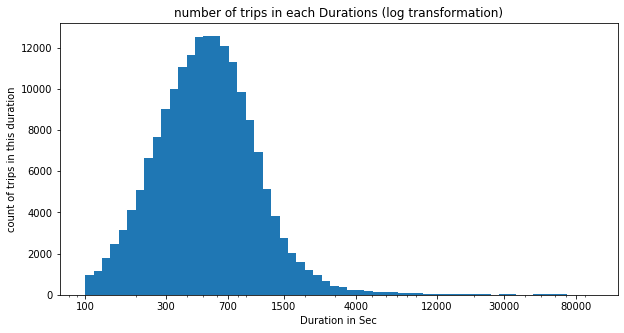

In [264]:
bins = 10 ** np.arange(2, 5.0 + 0.05, 0.05) 
plt.figure(figsize=[10, 5])
plt.hist(data=data, x='duration_sec', bins=bins)
ticks = [100, 300, 700 , 1500, 4000, 12000, 30000, 80000]
labels = ['{}'.format(val) for val in ticks]
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Duration in Sec')
plt.ylabel('count of trips in this duration')
plt.title('number of trips in each Durations (log transformation)')

### conclude
> plotting the duration of trip in sec so find many outliers and many data poits so make 3 different plotting
- First : focus on small area from 0 to 2000 sec of data to prevent plotting the outliars
- Second : divide all values by 60 to calculate the trip duration but in Mins to decrease the amount of data points
- Third : make scale transormation log

###### Counts of user type

In [179]:
data['user_type'].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

Text(0.5, 1.0, 'number of trips for each type')

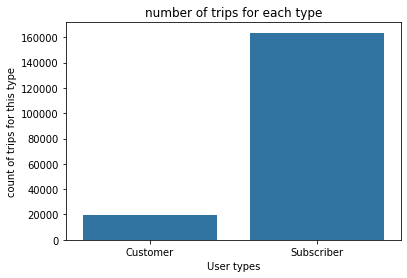

In [265]:
sb.countplot(data = data, x = 'user_type',color = default)
plt.xlabel('User types')
plt.ylabel('count of trips for this type')
plt.title('number of trips for each type')

### conclude
> plotting the type of user 
- customer count is about 20000
- but subscriber count is about 160000
- which subscriber is much larger than customer (8 times) most of users are subscriber

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> - The most common hour in trips is 17 which 5pm and the second most common is 8am (so this probably the begin and end time of work) 
> - The Lowest days in week is saturday and sunday which weekend so most common days is working days (from monday to friday) ---> american weekend
> - The most common trip's duration is about 4.5 Minutes (272 sec)
> - The number of subscribers are much more than number of customers user

> Make log transformation on duration's trip , the curve is skewed and there are points outliers

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Make log transformation on duration's trip 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

###### Days in week and Hours

Text(0.5, 1.0, 'Trips in each Hours for each day')

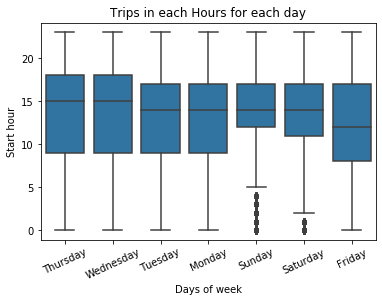

In [267]:
sb.boxplot(data=data, x='s_day_of_week', y='s_hour', color=default)
plt.xticks(rotation=25); 
plt.xlabel('Days of week')
plt.ylabel('Start hour')
plt.title('Trips in each Hours for each day')

###### Days in week and User type
- histgram

Text(0.5, 1.0, 'count of trips for each type in each day')

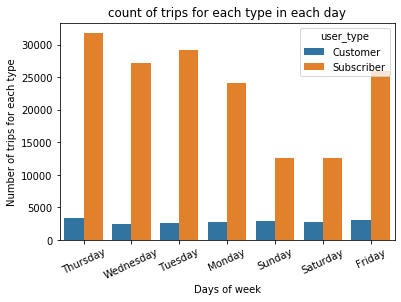

In [268]:
sb.countplot(data=data, x='s_day_of_week', hue='user_type')
plt.xticks(rotation=25); 
plt.xlabel('Days of week')
plt.ylabel('Number of trips for each type')
plt.title('count of trips for each type in each day')

- heatmap

In [275]:
ct_counts = data.groupby(['s_day_of_week', 'user_type']).size()
ct_counts = ct_counts.reset_index(name='count') #to make it dataframe
ct_counts

,s_day_of_week,user_type,count
0,Friday,Customer,3030
1,Friday,Subscriber,25951
2,Monday,Customer,2741
3,Monday,Subscriber,24111
4,Saturday,Customer,2739
5,Saturday,Subscriber,12666
6,Sunday,Customer,2896
7,Sunday,Subscriber,12627
8,Thursday,Customer,3390
9,Thursday,Subscriber,31807


user_type      Customer  Subscriber
s_day_of_week                      
Friday             3030       25951
Monday             2741       24111
Saturday           2739       12666
Sunday             2896       12627
Thursday           3390       31807
Tuesday            2606       29207
Wednesday          2466       27175


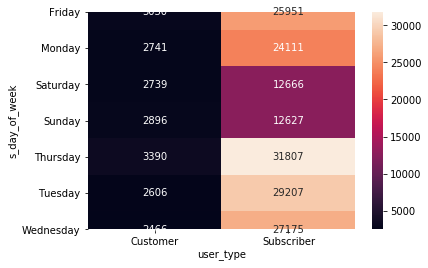

In [276]:
ct_counts = ct_counts.pivot(index = 's_day_of_week', columns = 'user_type', values = 'count')
print(ct_counts)
sb.heatmap(ct_counts, annot = True, fmt = 'd')


- histgram but splitted

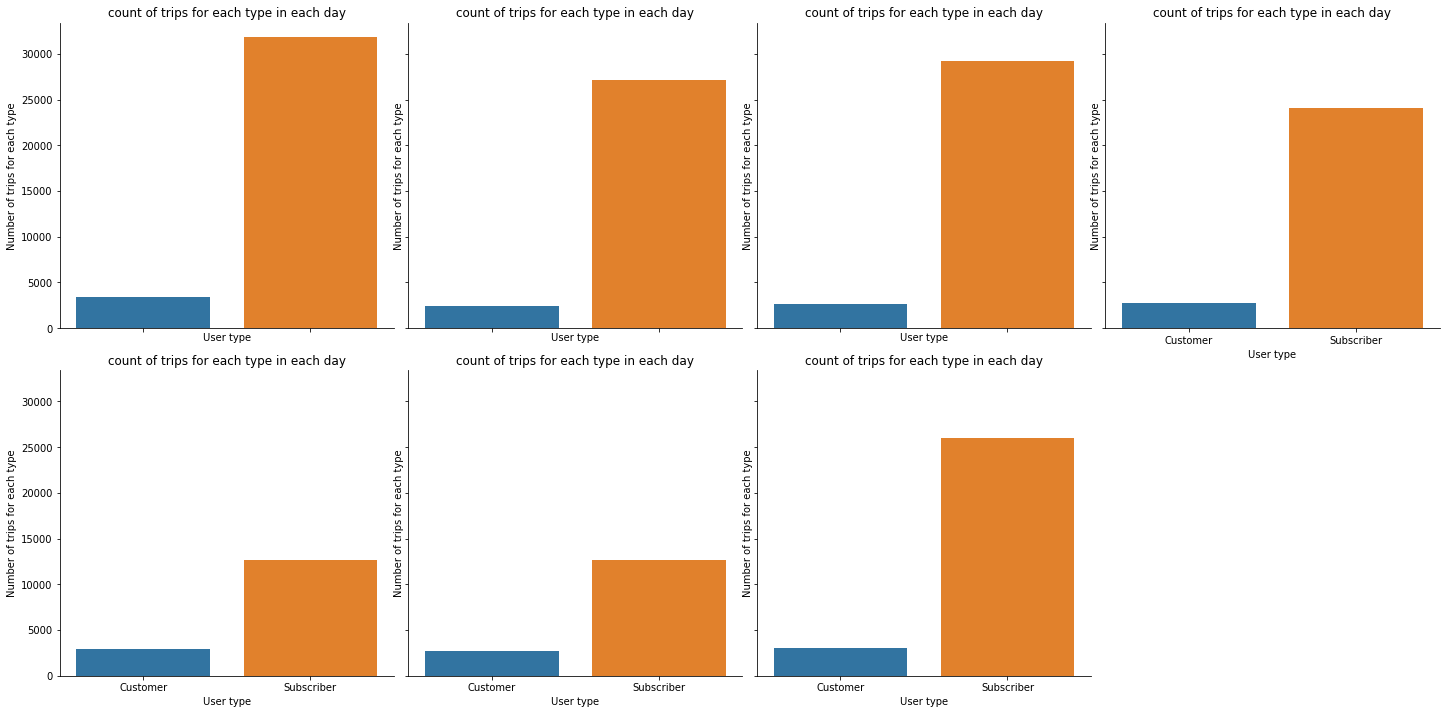

In [285]:
k=sb.factorplot( 'user_type',data = data , col = 's_day_of_week',kind='count',col_wrap = 4)
for i in range(7):
    k.axes[i].set_xlabel('User type')
    k.axes[i].set_ylabel('Number of trips for each type')
    k.axes[i].set_title('count of trips for each type in each day')

###### Days in week and Duration 
- in Mins & focus on duration <= 700

In [88]:
data['duration'] = (data['duration_sec'] / 60)

In [93]:
data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,s_month,s_hour,e_month,e_hour,average,duration
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000,183412.0,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437,2.0,13.458421,2.000087,13.614769,-0.156347,12.101307
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689,0.0,4.724978,0.009340,4.739638,0.915340,29.906496
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,2.0,0.000000,2.000000,0.000000,-17.000000,1.016667
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000,2.0,9.000000,2.000000,9.000000,0.000000,5.416667
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000,2.0,14.000000,2.000000,14.000000,0.000000,8.566667
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000,2.0,17.000000,2.000000,18.000000,0.000000,13.266667
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,2.0,23.000000,3.000000,23.000000,23.000000,1424.066667


Text(0.5, 1.0, 'Trip duration in each day of week (in Mins and less than 700)')

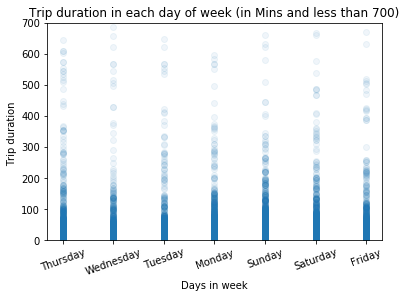

In [279]:
plt.scatter(data=data, x='s_day_of_week', y='duration',alpha=1/15)
plt.xticks(rotation=20); 
plt.ylim((0,700))
plt.xlabel('Days in week')
plt.ylabel('Trip duration in Mins')
plt.title('Trip duration in each day of week (in Mins and less than 700)')

- in Sec

Text(0.5, 1.0, 'Trip duration in each day of week (in Sec)')

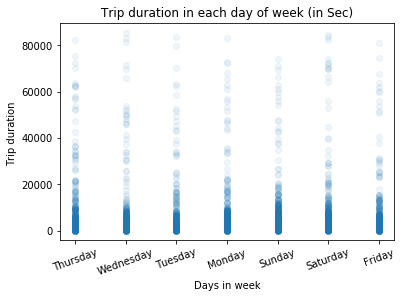

In [280]:
plt.scatter(data=data, x='s_day_of_week', y='duration_sec',alpha=1/15)
plt.xticks(rotation=20); 
plt.xlabel('Days in week')
plt.ylabel('Trip duration in Sec')
plt.title('Trip duration in each day of week (in Sec)')

###### Time (Hours) and Duration 
- in Mins

Text(0.5, 1.0, 'Trip duration in each hour of day (in Mins)')

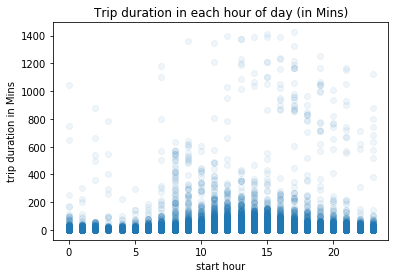

In [281]:
plt.scatter(data = data, x = 's_hour', y = 'duration',alpha=1/15);
plt.xlabel('start hour')
plt.ylabel('trip duration in Mins')
plt.title('Trip duration in each hour of day (in Mins)')

- in Sec

Text(0.5, 1.0, 'Trip duration in each hour of day (in Sec)')

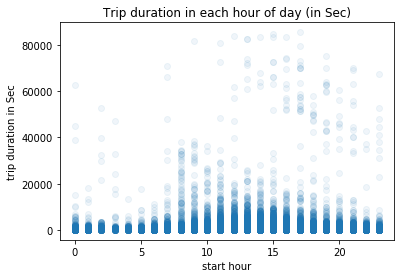

In [282]:
plt.scatter(data = data, x = 's_hour', y = 'duration_sec',alpha=1/15);
plt.xlabel('start hour')
plt.ylabel('trip duration in Sec')
plt.title('Trip duration in each hour of day (in Sec)')

###### Time (Hours) and User type 

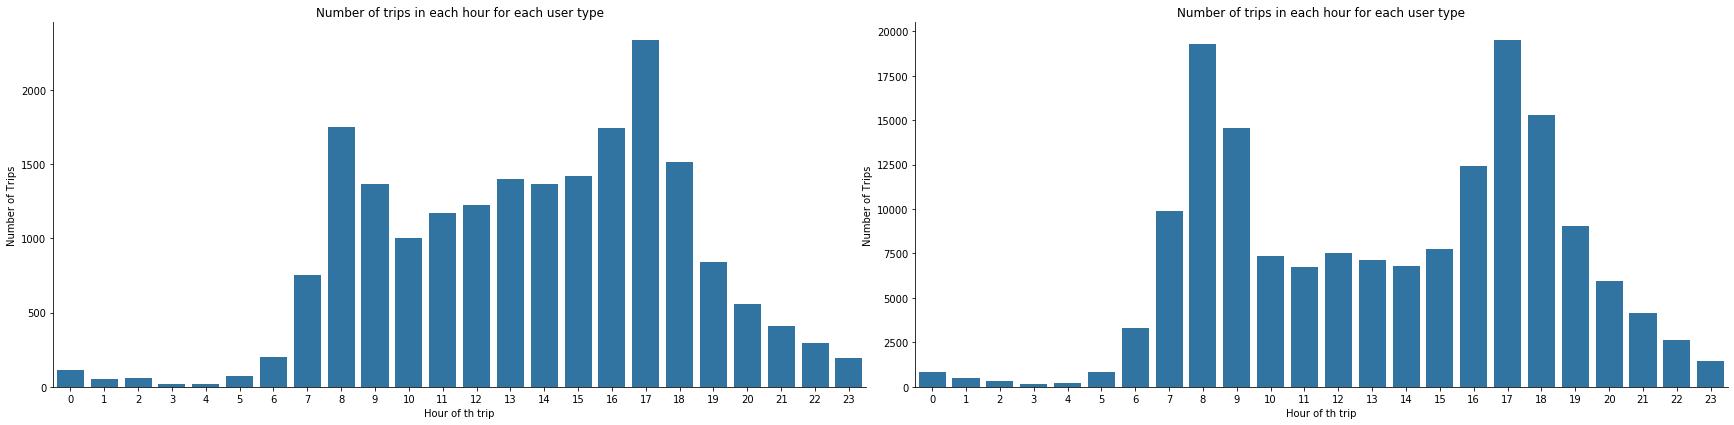

In [296]:
g = sb.FacetGrid(data=data,col='user_type', col_wrap = 2, height = 6, aspect=2, sharey=False)
g.map(sb.countplot, 's_hour')
for i in range(2):
    g.axes[i].set_xlabel('Hour of th trip')
    g.axes[i].set_ylabel('Number of Trips')
    g.axes[i].set_title('Number of trips in each hour for each user type')

###### User type and Gender

Text(0.5, 1.0, 'Number of trips for each gender and type of user')

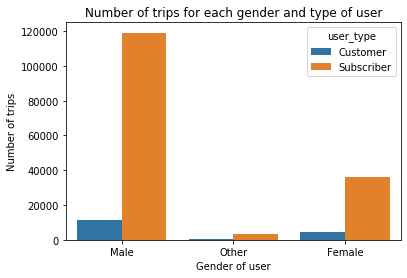

In [286]:
sb.countplot(data=data, x='member_gender', hue='user_type') 
plt.xlabel('Gender of user')
plt.ylabel('Number of trips')
plt.title('Number of trips for each gender and type of user')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>- Days in week & Time(Hours) : in all days the average hours from 10 to 17 (10am-5pm) , except in sunday & saturday (weekend days) the average hours from 13 to 16(1pm-3pm) and there are outliers 
>- Days in week & User type : in all days number of customers is much smaller than number of subscribers
>- Days in week & Trip's Duration : in all days the average duration of trip is less than 20000 sec - from 20000 to 60000 sec there are small amount - and from 60000 to 80000 there is outliers
>- Time(Hours) & Trip's Duration : from 12am (0) to 7am very low duration of trip - then increase from 8am (8) to 6pm (18) - then decrease again the duration from 7pm (19) to 11pm (23) 
>- Time(Hours) & User type : in customer all plotting under 2500 trips , the most common time between 8am (8) and 6pm(18) - in subscriber all plotting under 20000 trips , the most common time between 8am (8) and 6pm(18)  - and both customer , subscriber the most common hours 8am(8) , 5pm(17)


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> User type & Gender : most of gender are male but also in comparing user type most of type in both gender are subscriber so no effect of gender

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

###### User type and trip Duration and Time (Hours)

Text(0.5, 1.0, 'Trip duration for each user type in each hour')

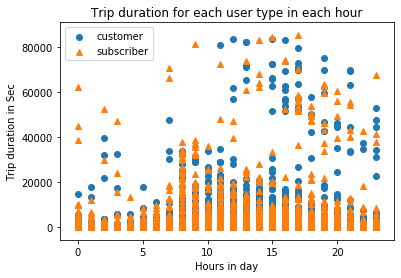

In [287]:
user_markers = [['Customer', 'o'],
               ['Subscriber', '^']]

for user, marker in user_markers:
    user_data = data[data['user_type'] == user]
    plt.scatter(data = user_data, x = 's_hour', y = 'duration_sec', marker = marker)
plt.legend(['customer','subscriber'])
plt.xlabel('Hours in day')
plt.ylabel('Trip duration in Sec')
plt.title('Trip duration for each user type in each hour')

###### Days in week and trip Duration and Time (Hours)

In [149]:
data['s_day_of_week'].value_counts()

Thursday     35197
Tuesday      31813
Wednesday    29641
Friday       28981
Monday       26852
Sunday       15523
Saturday     15405
Name: s_day_of_week, dtype: int64

Text(0.5, 1.0, 'Trip duration for each day in week in each hour')

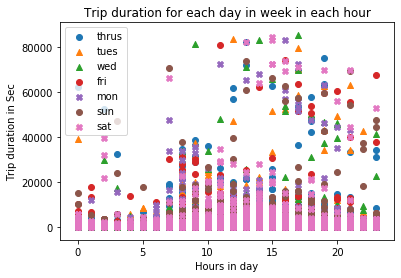

In [290]:
user_markers = [['Thursday', 'o'],
               ['Tuesday', '^'],                
               ['Wednesday', '^'],
                ['Friday', 'o'],
               ['Monday', 'X'],
               ['Sunday', 'o'],
               ['Saturday', 'X']]

for user, marker in user_markers:
    user_data = data[data['s_day_of_week'] == user]
    plt.scatter(data = user_data, x = 's_hour', y = 'duration_sec', marker = marker)
plt.legend(['thrus','tues','wed','fri','mon','sun','sat'])
#plt.ylim(0,600)
plt.xlabel('Hours in day')
plt.ylabel('Trip duration in Sec')
plt.title('Trip duration for each day in week in each hour')

###### Days in week and trip Duration and User type

Text(0.5, 1.0, 'Trip duration for each user type in each day in week')

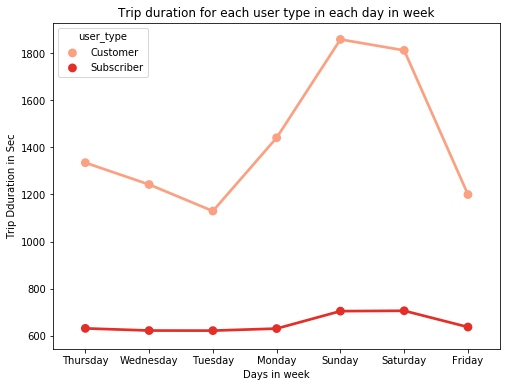

In [291]:
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = data, x = 's_day_of_week', y = 'duration_sec', hue = 'user_type', palette = 'Reds', ci=None)
plt.title('')
plt.ylabel('Trip Dduration in Sec')
plt.xlabel('Days in week')
plt.title('Trip duration for each user type in each day in week')


###### User type and trip Duration and Day in week and Time (Hours) 
###### All features together

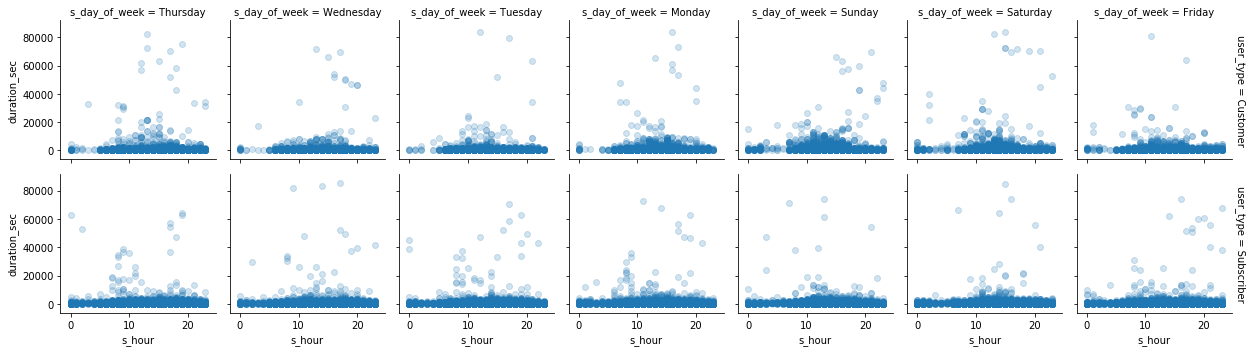

In [295]:
m=sb.FacetGrid(data = data, col = 's_day_of_week', row = 'user_type', size = 2.5,margin_titles = True)
m.map(plt.scatter,'s_hour','duration_sec',alpha=1/5)


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>- User type & Time & Duration :in both types (cust & subs) the duration of trips is small between time 0 and 7 and increase between time 8 and 23
>- Days in week & Time & Duration : most of days, the duration of trips is small between time 0 and 7 and increase between time 8 and 23
>- Days in week & User type & Duration : in customer, in all days trip duration is small except in sunday and saturday the trip duration increase a little   -   in subscriber, trip duration increase so much in sunday and saturday and decrease so much in tuesday and friday 
>- User type & trip Duration & Day in week & Time 
> <ol>
> <li>
    customer: in sunday and saturday the time between 8 and 17, the trip duration increase alittle and in all days time between 2 and 6 decrease so much
    </li>
> <li>
    subscriber: almost in all days the time between 8 and 20 the trip duration increase 
    </li>
> </ol>
### Were there any interesting or surprising interactions between features?

> the trip duration of customer is larger than subscriber espically in sunday and saturday